# Problem Statement

Build HR salary dashboard for hours-Train the dataset and predict salary with the help of the details provided : 
age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week and native-country.	

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data into Python environment
data=pd.read_csv('C:\\Users\\adilv\\Downloads\\salarydata.csv')
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Data Description
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
salary: <=50K or >50K

# Exploratory Data Analysis

In [4]:
# Head of the data
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Tail of the data
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# Shape of the data
data.shape

(32561, 14)

In [7]:
# Columns in the data
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [8]:
# Index of the data
data.index

RangeIndex(start=0, stop=32561, step=1)

In [9]:
# Details of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


There are no null values in the dataset

In [10]:
# Columns having object datatypes only
obj=data.select_dtypes(include=object).columns
obj

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

'workclass','education','marital-status','occupation','relationship','race','sex','native-country' and 'salary' are
object data types.

In [11]:
num=data.select_dtypes(include='number').columns
num

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

'age','education-num','capital-gain','capital-loss' and 'hours-per-week' are number data types.

In [12]:
# Summary of the data
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# Number of Unique values for each column in the data
data.nunique()

age                73
workclass           9
education          16
education-num      16
marital-status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     42
salary              2
dtype: int64

In [14]:
# Unique values in the column 'workclass'
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
# Unique values in the column 'education'
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [16]:
# Unique values in the column 'education-num'
data['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [17]:
# Unique values in the column 'marital-status'
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [18]:
# Unique values in the column 'occupation'
data['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [19]:
# Unique values in the column 'relationship'
data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [20]:
# Unique values in the column 'race'
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [21]:
# Unique values in the column 'sex'
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
# Unique values in the column 'native-country'
data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [23]:
# Unique values in the column 'salary'
data['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [8]:
data.duplicated().sum()

3465

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data=data.reset_index(drop=True)

In [6]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29091,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
29092,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
29093,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
29094,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
# Count of unique values in the column 'workclass'
data['workclass'].value_counts()

Private             19621
Self-emp-not-inc     2473
Local-gov            2040
?                    1632
State-gov            1272
Self-emp-inc         1091
Federal-gov           946
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [8]:
# Count of unique values in the column 'education'
data['education'].value_counts()

HS-grad         8886
Some-college    6378
Bachelors       4810
Masters         1653
Assoc-voc       1331
11th            1056
Assoc-acdm      1053
10th             867
7th-8th          629
Prof-school      566
9th              507
12th             414
Doctorate        402
5th-6th          328
1st-4th          166
Preschool         50
Name: education, dtype: int64

In [9]:
# Count of unique values in the column 'marital-status'
data['marital-status'].value_counts()

Married-civ-spouse       13249
Never-married             9173
Divorced                  4237
Separated                 1014
Widowed                    982
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [31]:
# Count of unique values in the column 'occupation'
data['occupation'].value_counts()

Prof-specialty       3885
Exec-managerial      3719
Adm-clerical         3340
Craft-repair         3298
Sales                3270
Other-service        2996
Machine-op-inspct    1702
?                    1639
Transport-moving     1445
Handlers-cleaners    1179
Farming-fishing       962
Tech-support          874
Protective-serv       631
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [32]:
# Count of unique values in the column 'relationship'
data['relationship'].value_counts()

Husband           11506
Not-in-family      7684
Own-child          4096
Unmarried          3317
Wife               1528
Other-relative      965
Name: relationship, dtype: int64

In [33]:
# Count of unique values in the column 'race'
data['race'].value_counts()

White                 24438
Black                  3038
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [34]:
# Count of unique values in the column 'sex'
data['sex'].value_counts()

Male      19246
Female     9850
Name: sex, dtype: int64

In [35]:
# Count of unique values in the column 'native-country'
data['native-country'].value_counts()

United-States                 25721
Mexico                          633
?                               580
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [36]:
# Count of unique values in the column 'salary'
data['salary'].value_counts()

<=50K    21886
>50K      7210
Name: salary, dtype: int64

In [37]:
# No.of individuals having salary greater than 50K
salary_grtr_50k=data[data['salary']=='>50K'].shape[0]
salary_grtr_50k

7210

In [38]:
# No.of individuals having salary less than or equal to 50K
salary_atmost_50k=data[data['salary']=='<=50K'].shape[0]
salary_atmost_50k

21886

In [39]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

<b>Data Cleaning<b/>

In [ ]:
# Replacing the '?' marks in 'workclass','occupation' and 'native-country' with mode

In [40]:
data['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [41]:
data['occupation'].mode()

0    Prof-specialty
Name: occupation, dtype: object

In [42]:
data['native-country'].mode()

0    United-States
Name: native-country, dtype: object

In [12]:
data['workclass']=data['workclass'].str.replace('?','Private')
data['occupation']=data['occupation'].str.replace('?','Prof-specialty')
data['native-country']=data['native-country'].str.replace('?','United-States')

In [10]:
# Replacing Educational Categories
data['education']=data['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School')
data['education']=data['education'].replace(['Some-college','Assoc-voc','Assoc-acdm','Prof-school'],'Higher')

In [11]:
# Replacing Marital-status Categories
data['marital-status']=data['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')
data['marital-status']=data['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Others')

In [46]:
data['education'].unique()

array(['Bachelors', 'HS-grad', 'School', 'Masters', 'Higher', 'Doctorate'],
      dtype=object)

In [47]:
data['marital-status'].unique()

array(['Never-married', 'Married', 'Others'], dtype=object)

In [48]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [49]:
data['education'].value_counts()

Higher       9328
HS-grad      8886
Bachelors    4810
School       4017
Masters      1653
Doctorate     402
Name: education, dtype: int64

In [50]:
data['marital-status'].value_counts()

Married          13272
Never-married     9173
Others            6651
Name: marital-status, dtype: int64

In [51]:
data['salary'].value_counts()

<=50K    21886
>50K      7210
Name: salary, dtype: int64

In [52]:
data['race'].value_counts()

White                 24438
Black                  3038
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [53]:
data['sex'].value_counts()

Male      19246
Female     9850
Name: sex, dtype: int64

In [54]:
data['relationship'].value_counts()

Husband           11506
Not-in-family      7684
Own-child          4096
Unmarried          3317
Wife               1528
Other-relative      965
Name: relationship, dtype: int64

In [55]:
data['workclass'].value_counts()

Private             21253
Self-emp-not-inc     2473
Local-gov            2040
State-gov            1272
Self-emp-inc         1091
Federal-gov           946
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
# Mapping salary <=50K to 0 and >50K to 1
data['salary']=data['salary'].map({'<=50K':0,'>50K':1})

In [14]:
data.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,0.030144,0.074310,0.049570,0.039831,0.215270
education-num,0.030144,1.000000,0.124182,0.080259,0.141446,0.332210
capital-gain,0.074310,0.124182,1.000000,-0.035294,0.077704,0.230696
capital-loss,0.049570,0.080259,-0.035294,1.000000,0.051636,0.153277
hours-per-week,0.039831,0.141446,0.077704,0.051636,1.000000,0.226323
salary,0.215270,0.332210,0.230696,0.153277,0.226323,1.000000


In [15]:
# Dropping the column 'education-num' since it represents the educational status. Similarly dropping the columns 
#'capital-gain' and 'capital-loss' since they have no relevance in predicting salary and from the excel data sheet,
# we can see that the values are zero in most of the columns.
data.drop(['capital-gain','capital-loss','education-num'],axis=1,inplace=True)

<b>Data Visualization</b>

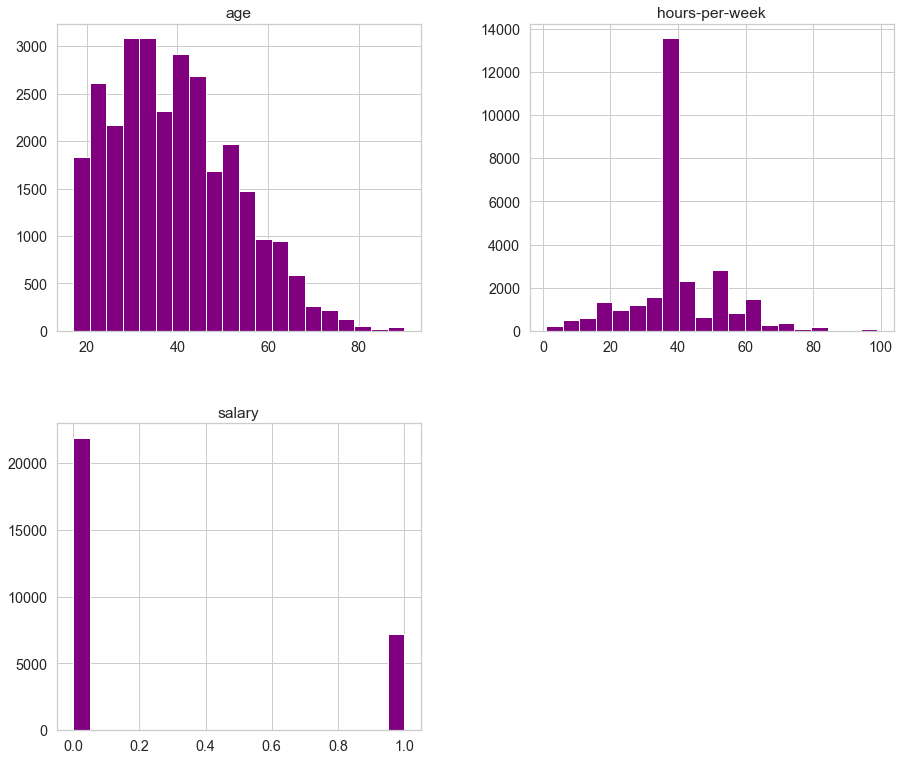

In [59]:
# Univariate Analysis
plt.rcParams['figure.figsize']=15,13
sns.set(style='whitegrid',font_scale=1.3)
ax=data.hist(bins=20,color='purple')
plt.show()

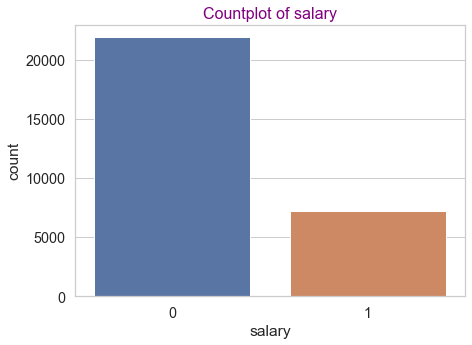

In [60]:
# Countplot of salary
plt.figure(figsize=(7,5))
sns.countplot(data['salary']).set_title('Countplot of salary',c='purple',fontsize=16)
plt.show()

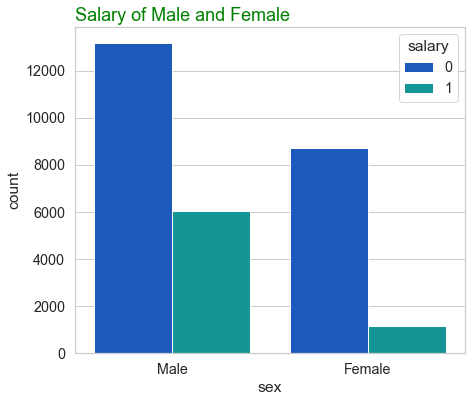

In [61]:
# Countplot of salary of Male and Female 
plt.figure(figsize=(7,6))
sns.countplot(data=data,x='sex',hue='salary',palette='winter').set_title('Salary of Male and Female',color='green',fontsize=18,loc='left')
plt.show()

In [ ]:
# Male individuals having salary<=50K are more in count.

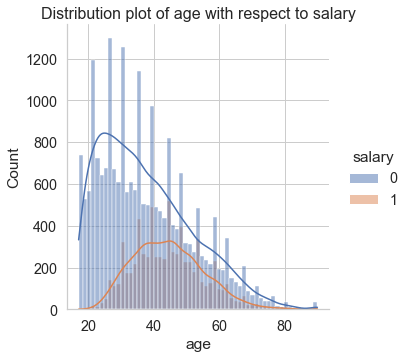

In [62]:
# Distribution plot with respect to target column 'salary'
sns.displot(data=data,x='age',hue='salary',kde=True)
plt.title('Distribution plot of age with respect to salary',fontsize=16)
plt.show()

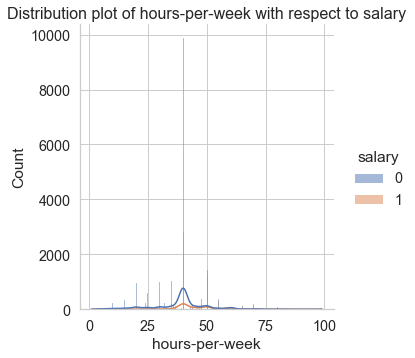

In [63]:
sns.displot(data=data,x='hours-per-week',hue='salary',kde=True)
plt.title('Distribution plot of hours-per-week with respect to salary',fontsize=16)
plt.show()

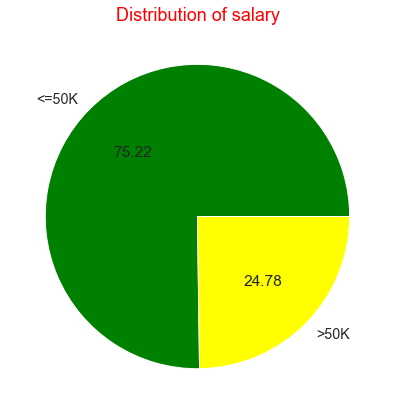

In [64]:
# Pie chart
plt.figure(figsize=(7,7))
plt.pie(data['salary'].value_counts(),labels=['<=50K','>50K'],autopct='%1.2f',colors=['green','yellow'])
plt.title('Distribution of salary',c='red',fontsize=18)
plt.show()

In [ ]:
# 75.22% of individuals have salary less than or equal to 50K.

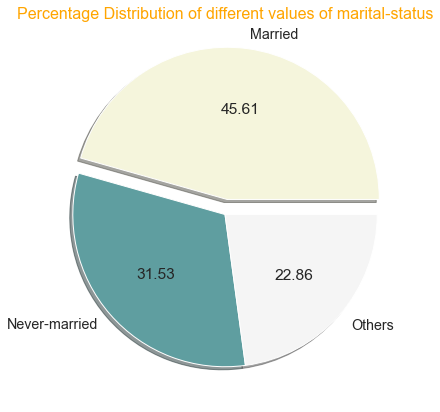

In [65]:
plt.figure(figsize=(7,7))
plt.pie(data['marital-status'].value_counts(),labels=['Married','Never-married','Others'],explode=[0.1,0,0],shadow=True,colors=['beige','cadetblue','whitesmoke'],autopct ='%0.2f')
plt.title('Percentage Distribution of different values of marital-status',fontsize=16,c='orange')
plt.show()

In [ ]:
# Among the different marital-status,45.61% of individuals are Married.

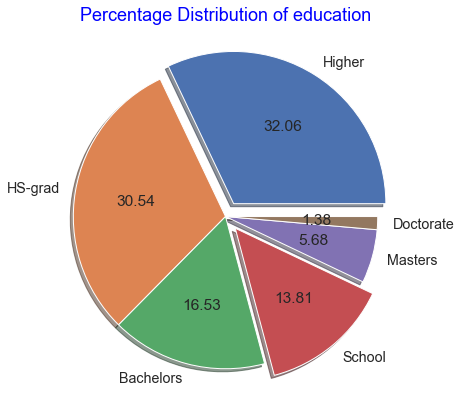

In [66]:
plt.figure(figsize=(7,7))
plt.pie(data['education'].value_counts(),labels=['Higher','HS-grad','Bachelors','School','Masters','Doctorate'],explode=[0.1,0,0,0.1,0,0],shadow=True,autopct='%1.2f')
plt.title('Percentage Distribution of education',c='blue',fontsize=18)
plt.show()

In [ ]:
# More individuals have Higher education

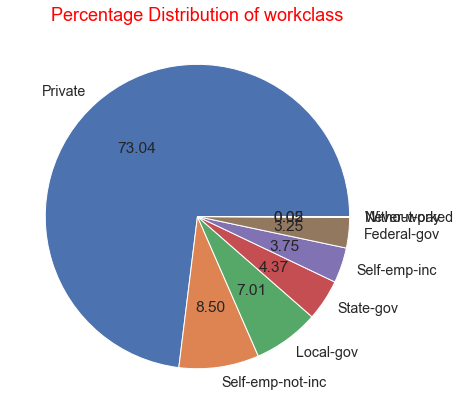

In [67]:
plt.figure(figsize=(7,7))
plt.pie(data['workclass'].value_counts(),labels=['Private','Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked'],autopct='%1.2f')
plt.title('Percentage Distribution of workclass',c='red',fontsize=18)
plt.show()

In [ ]:
# Among workclass,73.04% is Private

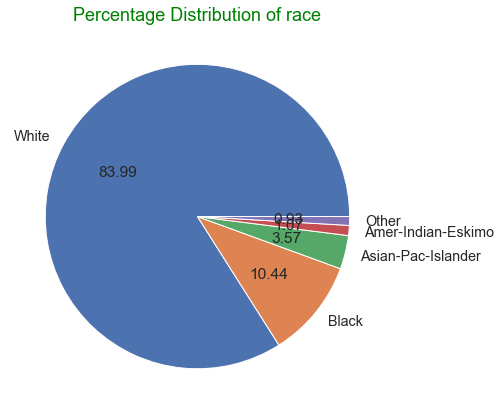

In [68]:
plt.figure(figsize=(7,7))
plt.pie(data['race'].value_counts(),labels=['White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'],autopct='%1.2f')
plt.title('Percentage Distribution of race',c='green',fontsize=18)
plt.show()

In [ ]:
# 83.99% of the race is White

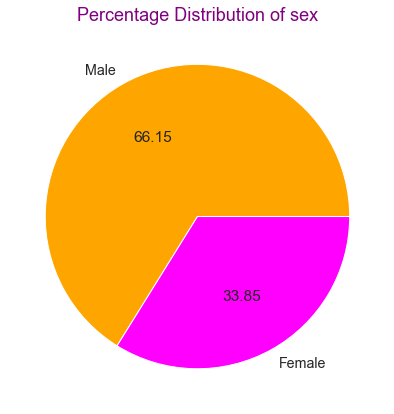

In [69]:
plt.figure(figsize=(7,7))
plt.pie(data['sex'].value_counts(),labels=['Male','Female'],autopct='%1.2f',colors=['orange','magenta'])
plt.title('Percentage Distribution of sex',c='purple',fontsize=18)
plt.show()

In [ ]:
# 66.15% of the individuals are Males

Text(0.5, 1.0, 'Bar plot of relationship')

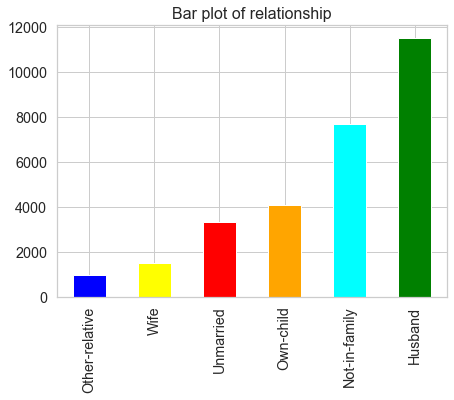

In [70]:
# Bar plot
plt.figure(figsize=(7,5))
data['relationship'].value_counts().sort_values().plot(kind='bar',color=['blue','yellow','red','orange','cyan','green'])
plt.title('Bar plot of relationship',fontsize=16)

In [ ]:
# The relationship Husband is the most and Other-relative is the least

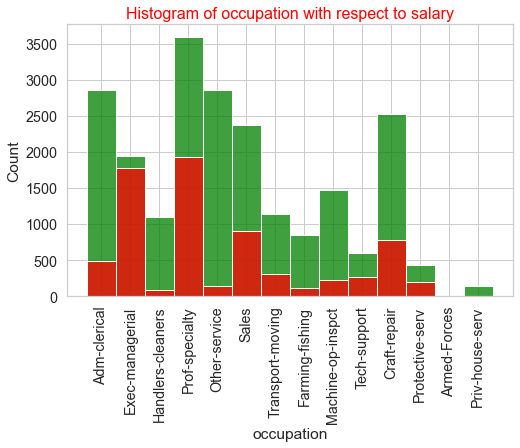

In [71]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(data[data['salary']==0]['occupation'],color='green')
sns.histplot(data[data['salary']==1]['occupation'],color='red').set_title('Histogram of occupation with respect to salary',c='red',fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

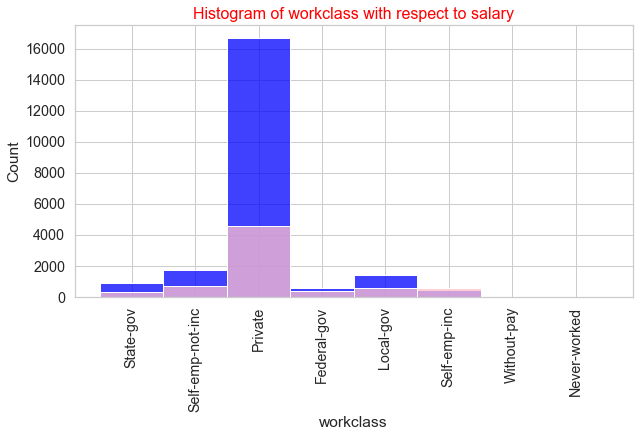

In [72]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['salary']==0]['workclass'],color='blue')
sns.histplot(data[data['salary']==1]['workclass'],color='pink').set_title('Histogram of workclass with respect to salary',c='red',fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

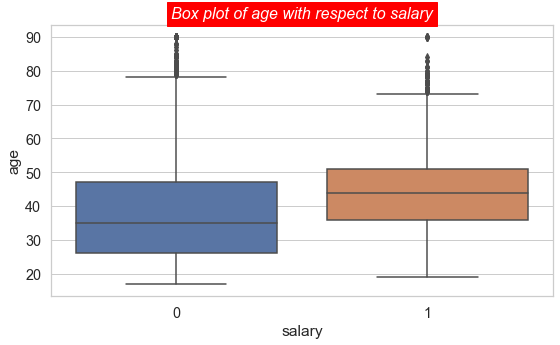

In [73]:
plt.figure(figsize=(9,5))
sns.set_style('whitegrid')
sns.boxplot(data=data, y='age', x='salary').set_title('Box plot of age with respect to salary',fontstyle='oblique',fontsize=16,c='white',backgroundcolor='red')
plt.show()

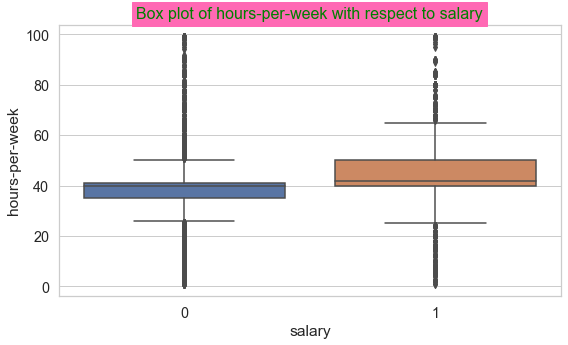

In [74]:
plt.figure(figsize=(9,5))
sns.set_style('whitegrid')
sns.boxplot(data=data, y='hours-per-week', x='salary').set_title('Box plot of hours-per-week with respect to salary',fontsize=16,c='green',backgroundcolor='hotpink')
plt.show()

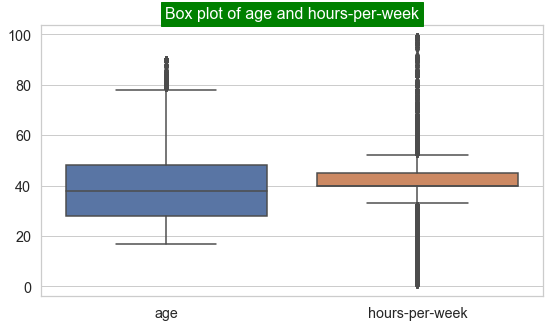

In [75]:
plt.figure(figsize=(9,5))
sns.set_style('whitegrid')
sns.boxplot(data=data[['age','hours-per-week']]).set_title('Box plot of age and hours-per-week',fontsize=16,c='white',backgroundcolor='green')
plt.show()

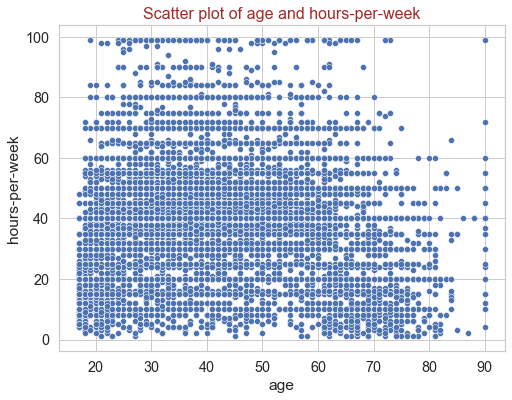

In [76]:
# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['age'],y=data['hours-per-week'])
plt.title('Scatter plot of age and hours-per-week',c='brown',fontsize=16)
plt.show()

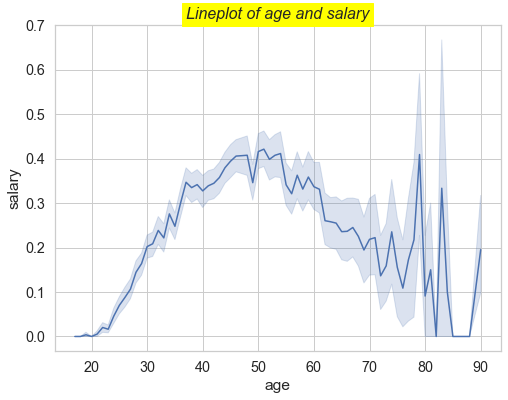

In [77]:
# Lineplot
plt.figure(figsize=(8,6))
sns.lineplot(data=data,x='age',y='salary').set_title('Lineplot of age and salary',fontsize=16,fontstyle='italic',backgroundcolor='yellow')
plt.show()

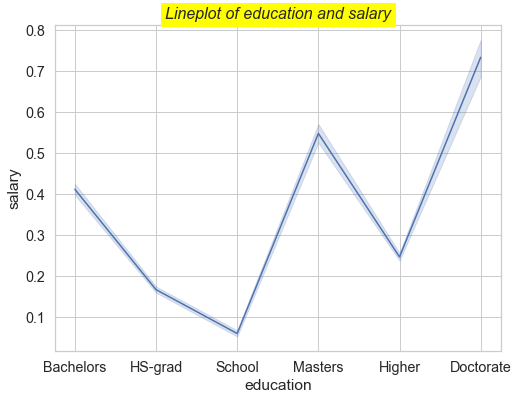

In [78]:
plt.figure(figsize=(8,6))
sns.lineplot(data=data,x='education',y='salary').set_title('Lineplot of education and salary',fontsize=16,fontstyle='italic',backgroundcolor='yellow')
plt.show()

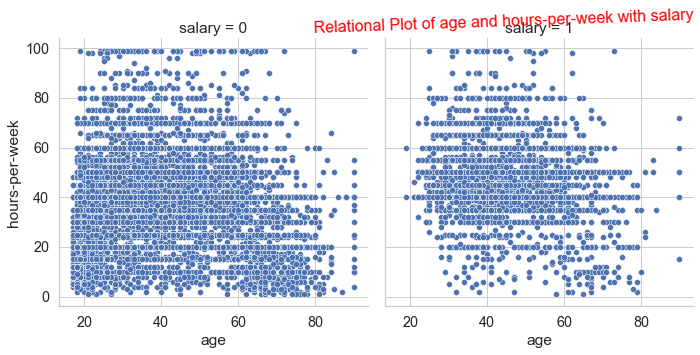

In [79]:
# Relational plot
sns.relplot(x=data['age'],y=data['hours-per-week'],col=data['salary'])
plt.title('Relational Plot of age and hours-per-week with salary',fontsize=16,rotation=2,loc='right',c='red')
plt.show()

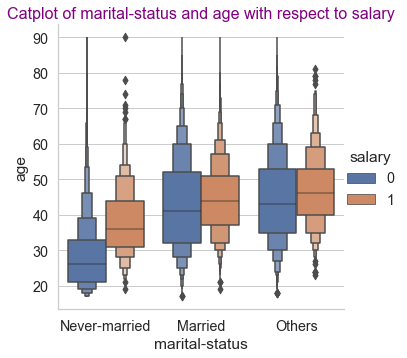

In [80]:
# Categorical Plot
sns.catplot(data=data,x='marital-status',y='age',hue='salary',kind='boxen')
plt.title('Catplot of marital-status and age with respect to salary',fontsize=16,c='purple')
plt.show()

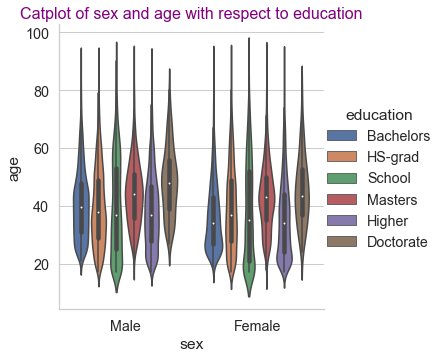

In [81]:
# Categorical Plot
sns.catplot(data=data,x='sex',y='age',hue='education',kind='violin')
plt.title('Catplot of sex and age with respect to education',fontsize=16,c='purple')
plt.show()

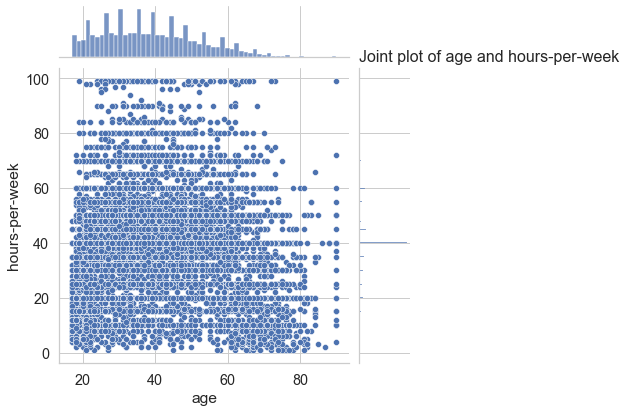

In [82]:
# Joint plot
sns.jointplot(data=data,x='age',y='hours-per-week')
plt.title('Joint plot of age and hours-per-week',fontsize=16,loc='left')
plt.show()

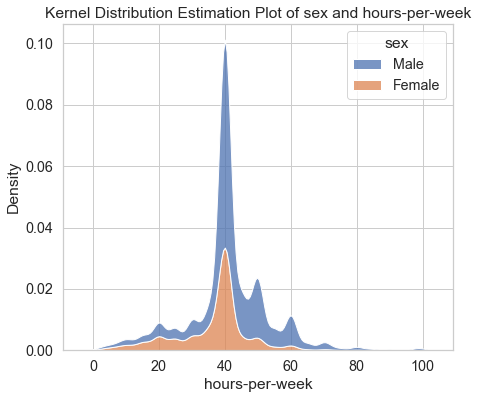

In [83]:
# kde plot
plt.figure(figsize=(7,6))
sns.kdeplot(data=data,x='hours-per-week',hue='sex',multiple='stack').set_title('Kernel Distribution Estimation Plot of sex and hours-per-week')
plt.show()

<AxesSubplot:>

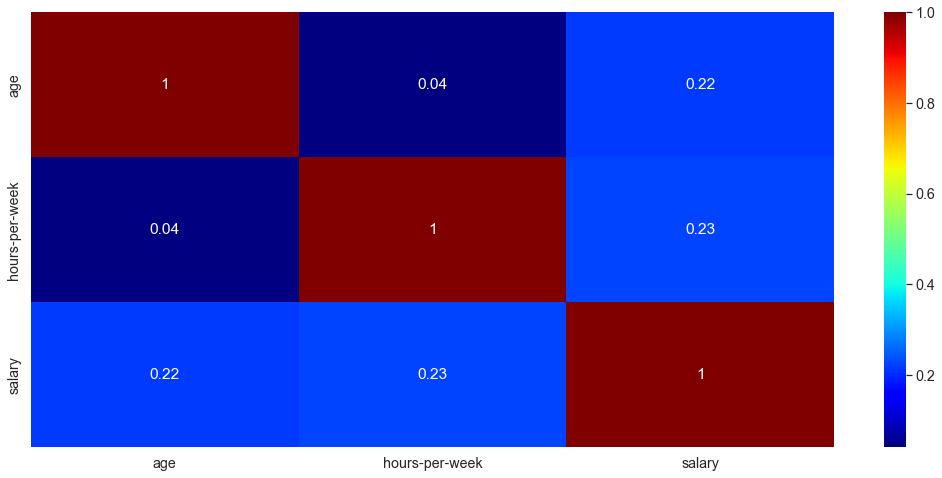

In [84]:
# Correlation Heatmap
corr_matrix=data.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='jet')

In [ ]:
# There is no high correlation of features with the target column 'salary' and also among themselves.

In [85]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,School,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40,Cuba,0


<b>Data Pre-processing<b/>

In [ ]:
# There are no null values in the dataset

<b>Handling Outliers</b>

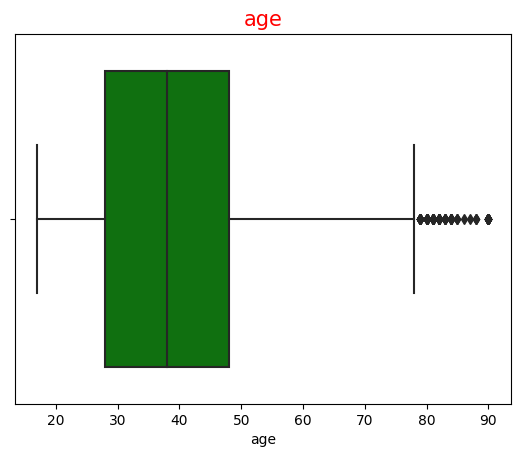

In [17]:
# Box plot of the column 'age'
sns.boxplot(data['age'],palette=['green'])
plt.title('age',fontsize=15,c='red')
plt.show()

In [18]:
# Finding interquartile range and detecting the outliers of the column 'age'
Q1=np.percentile(data['age'],25)
Q3=np.percentile(data['age'],75)
print(Q1)
print(Q3)

28.0
48.0


In [19]:
IQR=Q3-Q1
IQR

20.0

In [20]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
low_lim,up_lim

(-2.0, 78.0)

In [21]:
outliers=[]
for x in data['age']:
    if(x<low_lim)or(x>up_lim):
        outliers.append(x)

In [22]:
outliers

[79,
 90,
 80,
 81,
 90,
 88,
 90,
 90,
 80,
 90,
 81,
 82,
 79,
 81,
 80,
 83,
 90,
 90,
 79,
 81,
 90,
 80,
 90,
 90,
 79,
 79,
 84,
 90,
 80,
 90,
 81,
 83,
 84,
 81,
 79,
 85,
 82,
 79,
 80,
 90,
 90,
 90,
 84,
 80,
 90,
 90,
 79,
 84,
 90,
 79,
 90,
 90,
 90,
 82,
 81,
 90,
 84,
 79,
 81,
 82,
 81,
 80,
 90,
 80,
 84,
 82,
 79,
 90,
 84,
 90,
 83,
 79,
 81,
 80,
 79,
 80,
 79,
 80,
 90,
 90,
 80,
 90,
 90,
 81,
 83,
 82,
 90,
 90,
 81,
 80,
 80,
 90,
 79,
 80,
 82,
 85,
 80,
 79,
 90,
 81,
 79,
 80,
 79,
 81,
 82,
 88,
 90,
 82,
 88,
 84,
 83,
 79,
 86,
 90,
 90,
 82,
 83,
 81,
 79,
 90,
 80,
 81,
 79,
 84,
 84,
 79,
 90,
 80,
 81,
 81,
 81,
 87,
 90,
 80,
 80,
 82,
 90,
 90,
 85,
 82,
 81]

In [23]:
data['age']=np.where(data['age']<low_lim,low_lim,np.where(data['age']>up_lim,up_lim,data['age']))

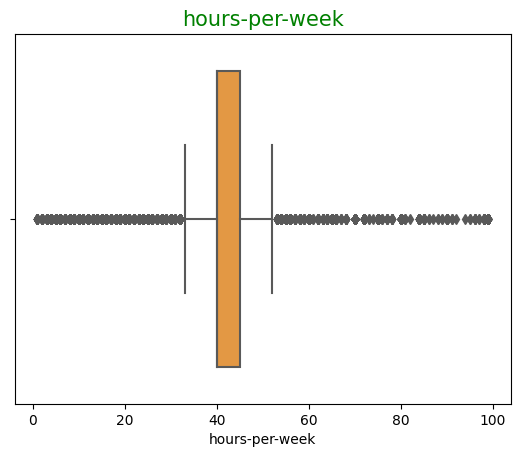

In [24]:
#Box plot of the column hours-per-week
sns.boxplot(data['hours-per-week'],palette='YlOrBr_r')
plt.title('hours-per-week',fontsize=15,c='green')
plt.show()

In [25]:
# Finding interquartile range and detecting the outliers of the column 'hours-per-week'
Q1=np.percentile(data['hours-per-week'],25)
Q3=np.percentile(data['hours-per-week'],75)
print(Q1)
print(Q3)

40.0
45.0


In [26]:
IQR=Q3-Q1
IQR

5.0

In [27]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
low_lim,up_lim

(32.5, 52.5)

In [28]:
outliers=[]
for x in data['hours-per-week']:
    if(x<low_lim)or(x>up_lim):
        outliers.append(x)

In [29]:
outliers

[13,
 16,
 80,
 30,
 60,
 20,
 60,
 80,
 15,
 25,
 30,
 60,
 55,
 60,
 58,
 32,
 70,
 20,
 2,
 22,
 30,
 25,
 60,
 60,
 32,
 25,
 56,
 60,
 28,
 60,
 60,
 20,
 30,
 30,
 24,
 24,
 2,
 60,
 20,
 16,
 20,
 25,
 12,
 65,
 1,
 28,
 24,
 55,
 60,
 12,
 60,
 55,
 20,
 10,
 20,
 55,
 70,
 20,
 20,
 60,
 30,
 20,
 30,
 60,
 12,
 75,
 24,
 24,
 98,
 15,
 60,
 56,
 16,
 60,
 80,
 25,
 54,
 25,
 15,
 24,
 10,
 15,
 55,
 60,
 30,
 20,
 8,
 25,
 25,
 30,
 24,
 55,
 15,
 15,
 10,
 10,
 30,
 25,
 6,
 16,
 55,
 64,
 65,
 25,
 24,
 60,
 19,
 30,
 18,
 60,
 72,
 24,
 25,
 60,
 28,
 5,
 55,
 60,
 20,
 60,
 16,
 60,
 24,
 6,
 30,
 20,
 20,
 20,
 60,
 60,
 25,
 20,
 20,
 8,
 30,
 20,
 24,
 80,
 58,
 9,
 30,
 8,
 20,
 32,
 55,
 60,
 12,
 70,
 25,
 30,
 24,
 60,
 80,
 25,
 28,
 21,
 60,
 20,
 60,
 32,
 55,
 20,
 20,
 24,
 55,
 60,
 64,
 26,
 60,
 60,
 14,
 60,
 60,
 55,
 15,
 20,
 32,
 15,
 60,
 25,
 20,
 10,
 16,
 5,
 4,
 55,
 30,
 20,
 20,
 60,
 20,
 30,
 65,
 25,
 15,
 60,
 20,
 59,
 24,
 15,
 20,
 25,
 7

In [30]:
data['hours-per-week']=np.where(data['hours-per-week']<low_lim,low_lim,np.where(data['hours-per-week']>up_lim,up_lim,data['hours-per-week']))

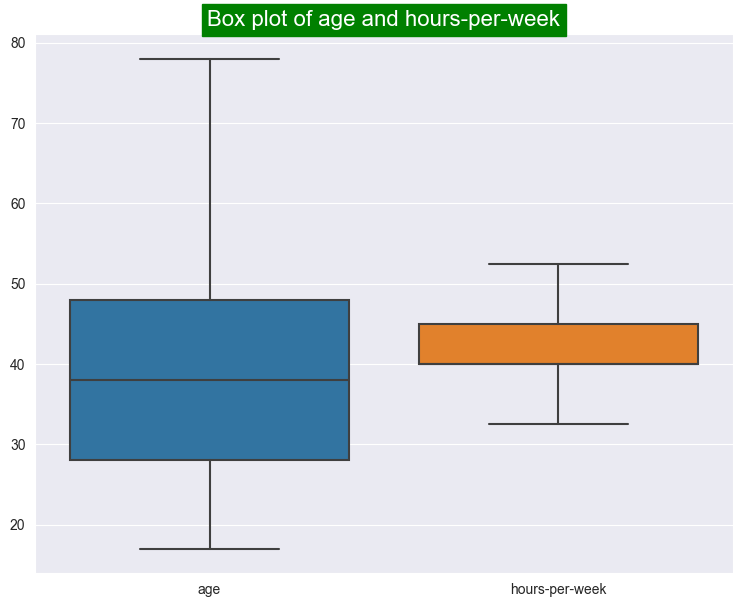

In [31]:
plt.figure(figsize=(9,7))
sns.set_style('darkgrid')
sns.boxplot(data=data[['age','hours-per-week']]).set_title('Box plot of age and hours-per-week',fontsize=16,c='white',backgroundcolor='green')
#sns.boxplot(data=data[['age','hours-per-week']])
plt.show()

In [ ]:
# There are no outliers.

<b>Feature Encoding<b/>

In [32]:
# Label Encoding Categorical columns
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data['workclass']=lab_enc.fit_transform(data['workclass'])
data['education']=lab_enc.fit_transform(data['education'])
data['marital-status']=lab_enc.fit_transform(data['marital-status'])
data['occupation']=lab_enc.fit_transform(data['occupation'])
data['relationship']=lab_enc.fit_transform(data['relationship'])
data['race']=lab_enc.fit_transform(data['race'])
data['sex']=lab_enc.fit_transform(data['sex'])
data['native-country']=lab_enc.fit_transform(data['native-country'])

In [102]:
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39.0,6,0,1,0,1,4,1,40.0,38,0
1,50.0,5,0,0,3,0,4,1,32.5,38,0
2,38.0,3,2,2,5,1,4,1,40.0,38,0
3,53.0,3,5,0,5,0,2,1,40.0,38,0
4,28.0,3,0,0,9,5,2,0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
29091,53.0,3,4,0,3,0,4,1,40.0,38,1
29092,22.0,3,3,1,10,1,4,1,40.0,38,0
29093,27.0,3,3,0,12,5,4,0,38.0,38,0
29094,58.0,3,2,2,0,4,4,0,40.0,38,0


<AxesSubplot:>

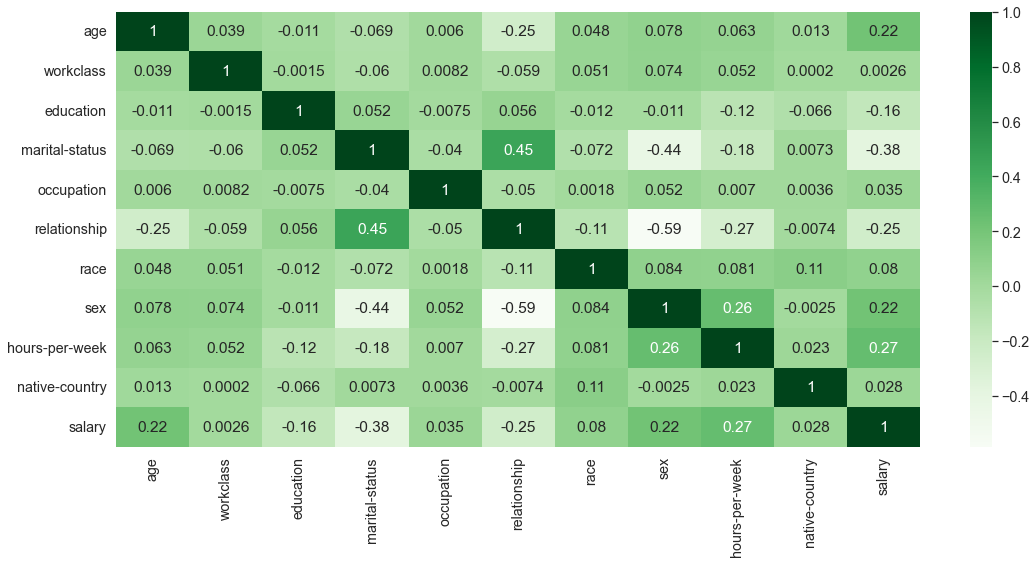

In [103]:
# Correlation Heatmap after Label Encoding
corr_matrix=data.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='Greens')

In [ ]:
data.to_csv('Preprocessed salarydata.csv',index=False)

<b>Feature Scaling</b>

In [33]:
X=data.drop(['salary'],axis=1)
y=data['salary']

In [28]:
#Standard Scaling 
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()

In [29]:
X1=X.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country'],axis=1)

In [31]:
X1=std_scl.fit_transform(X1)

In [32]:
X1=pd.DataFrame(X1,columns=['age','hours-per-week'])

In [33]:
X=X.drop(['age','hours-per-week'],axis=1)

In [34]:
X=pd.concat([X,X1],axis=1)

In [35]:
X

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,hours-per-week
0,6,0,1,0,1,4,1,38,-0.016402,-0.210437
1,5,0,0,3,0,4,1,38,0.792599,-1.390030
2,3,2,2,5,1,4,1,38,-0.089948,-0.210437
3,3,5,0,5,0,2,1,38,1.013235,-0.210437
4,3,0,0,9,5,2,0,4,-0.825403,-0.210437
...,...,...,...,...,...,...,...,...,...,...
29091,3,4,0,3,0,4,1,38,1.013235,-0.210437
29092,3,3,1,10,1,4,1,38,-1.266676,-0.210437
29093,3,3,0,12,5,4,0,38,-0.898948,-0.524995
29094,3,2,2,0,4,4,0,38,1.380963,-0.210437


# Model

In [34]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

# Creating Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr_model=LogisticRegression().fit(X_train,y_train)
y_pred_log=lr_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [40]:
confusion_matrix(y_test,y_pred_log)

array([[4009,  388],
       [ 844,  579]], dtype=int64)

In [41]:
print('Accuracy score is :',accuracy_score(y_test,y_pred_log))

Accuracy score is : 0.7883161512027491


In [42]:
precision_score(y_test,y_pred_log)

0.5987590486039297

In [43]:
recall_score(y_test,y_pred_log)

0.40688685874912156

In [44]:
f1_score(y_test,y_pred_log)

0.4845188284518828

In [45]:
from sklearn.metrics import classification_report
print('classification_report :\n',classification_report(y_test,y_pred_log))

classification_report :
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      4397
           1       0.60      0.41      0.48      1423

    accuracy                           0.79      5820
   macro avg       0.71      0.66      0.68      5820
weighted avg       0.77      0.79      0.77      5820



# Creating kNN Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
     classifier=KNeighborsClassifier(n_neighbors=k)
     kNN_model=classifier.fit(X_train,y_train)
     y_pred_kNN=kNN_model.predict(X_test)
     acc=accuracy_score(y_test,y_pred_kNN)
     metric_k.append(acc)

In [49]:
metric_k

[0.8039518900343643,
 0.8063573883161512,
 0.8079037800687285,
 0.811340206185567,
 0.8166666666666667,
 0.8163230240549828,
 0.8176975945017182,
 0.8168384879725086,
 0.8175257731958763,
 0.818041237113402,
 0.8195876288659794,
 0.8214776632302405]

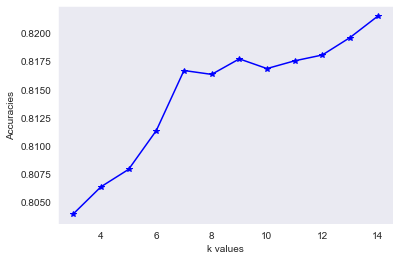

In [50]:
#Plotting Accuracies and k_values
plt.plot(neighbors,metric_k,'*-',c='blue')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [51]:
accuracy_score(y_test,y_pred_kNN)

0.8214776632302405

In [52]:
classifier=KNeighborsClassifier(n_neighbors=14)
kNN_model=classifier.fit(X_train,y_train)
y_pred_kNN=kNN_model.predict(X_test)

In [53]:
confusion_matrix(y_test,y_pred_kNN)

array([[4057,  340],
       [ 699,  724]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred_kNN)

0.8214776632302405

In [55]:
precision_score(y_test,y_pred_kNN)

0.6804511278195489

In [56]:
recall_score(y_test,y_pred_kNN)

0.5087842586085735

In [57]:
f1_score(y_test,y_pred_kNN)

0.582227583433856

In [58]:
print('classification_report :\n',classification_report(y_test,y_pred_kNN))

classification_report :
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      4397
           1       0.68      0.51      0.58      1423

    accuracy                           0.82      5820
   macro avg       0.77      0.72      0.73      5820
weighted avg       0.81      0.82      0.81      5820



# Creating SVM Model (SVC-Support Vector Classifier)..Linear Kernel

In [37]:
from sklearn.svm import SVC

In [60]:
svm_lin_model=SVC(kernel='linear').fit(X_train,y_train)
y_pred_svm1=svm_lin_model.predict(X_test)

In [61]:
confusion_matrix(y_test,y_pred_svm1)

array([[4130,  267],
       [ 961,  462]], dtype=int64)

In [62]:
accuracy_score(y_test,y_pred_svm1)

0.7890034364261168

In [63]:
precision_score(y_test,y_pred_svm1)

0.6337448559670782

In [64]:
recall_score(y_test,y_pred_svm1)

0.32466619817287423

In [65]:
f1_score(y_test,y_pred_svm1)

0.42936802973977695

In [66]:
print('classification_report :\n',classification_report(y_test,y_pred_svm1))

classification_report :
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      4397
           1       0.63      0.32      0.43      1423

    accuracy                           0.79      5820
   macro avg       0.72      0.63      0.65      5820
weighted avg       0.77      0.79      0.76      5820



In [38]:
svm_rbf_model=SVC(kernel='rbf').fit(X_train,y_train)
y_pred_svm2=svm_rbf_model.predict(X_test)

In [41]:
confusion_matrix(y_test,y_pred_svm2)

array([[4390,    7],
       [1390,   33]], dtype=int64)

In [42]:
accuracy_score(y_test,y_pred_svm2)

0.7599656357388316

In [43]:
precision_score(y_test,y_pred_svm2)

0.825

In [44]:
recall_score(y_test,y_pred_svm2)

0.023190442726633873

In [45]:
f1_score(y_test,y_pred_svm2)

0.04511278195488722

In [46]:
print('classification_report :\n',classification_report(y_test,y_pred_svm2))

NameError: name 'classification_report' is not defined

# Creating DecisionTreeClassifier Model

In [37]:
X=data.drop(['salary'],axis=1)
y=data['salary']

In [38]:
# Splitting into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dec_tree_model=DecisionTreeClassifier().fit(X_train,y_train)
y_pred_tree=dec_tree_model.predict(X_test)

In [51]:
confusion_matrix(y_test,y_pred_tree)

array([[3741,  656],
       [ 723,  700]], dtype=int64)

In [52]:
accuracy_score(y_test,y_pred_tree)

0.7630584192439862

In [53]:
precision_score(y_test,y_pred_tree)

0.5162241887905604

In [54]:
recall_score(y_test,y_pred_tree)

0.49191848208011246

In [55]:
f1_score(y_test,y_pred_tree)

0.5037783375314862

In [56]:
print('classification_report :\n',classification_report(y_test,y_pred_tree))

NameError: name 'classification_report' is not defined

# Creating RandomForestClassifier Model

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rand_for_model=RandomForestClassifier().fit(X_train,y_train)
y_pred_rand=rand_for_model.predict(X_test)

In [59]:
confusion_matrix(y_test,y_pred_rand)

array([[3920,  477],
       [ 671,  752]], dtype=int64)

In [60]:
accuracy_score(y_test,y_pred_rand)

0.8027491408934708

In [61]:
precision_score(y_test,y_pred_rand)

0.611879576891782

In [62]:
recall_score(y_test,y_pred_rand)

0.5284609978917779

In [63]:
f1_score(y_test,y_pred_rand)

0.5671191553544495

In [173]:
print('classification_report :\n',classification_report(y_test,y_pred_rand))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



# Creating GradientBoostingClassifier Model

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
grad_boost_model=GradientBoostingClassifier().fit(X_train,y_train)
y_pred_grad=grad_boost_model.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred_grad)

array([[4044,  353],
       [ 584,  839]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred_grad)

0.8390034364261169

In [40]:
precision_score(y_test,y_pred_grad)

0.7038590604026845

In [41]:
recall_score(y_test,y_pred_grad)

0.5895994378074491

In [42]:
f1_score(y_test,y_pred_grad)

0.6416826003824092

In [39]:
print('classification_report :\n',classification_report(y_test,y_pred_grad))

NameError: name 'classification_report' is not defined

Fine Tuning Gradient Boosting Classifier Model

In [40]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [41]:
grad_boost_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

<b>Hyperparameter Tuning-GridSearchCV</b>

In [70]:
parameters={'n_estimators':[100,250,500],'max_depth':[3,5,7],'learning_rate':[0.1,0.5,1]}

In [71]:
grid_model=GridSearchCV(GradientBoostingClassifier(),parameters,scoring='accuracy')
grid_model.fit(X_train,y_train)
print(grid_model.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}


In [72]:
model_grid=GradientBoostingClassifier(learning_rate=0.1,n_estimators=250,max_depth=3)
model1=model_grid.fit(X_train,y_train)
y_pred_grid=model1.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred_grid)

0.8369415807560138

In [74]:
precision_score(y_test,y_pred_grid)

0.6952224052718287

In [75]:
recall_score(y_test,y_pred_grid)

0.5931131412508784

In [76]:
f1_score(y_test,y_pred_grid)

0.6401213500189609

In [198]:
print('classification_report :\n',classification_report(y_test,y_pred_grid))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



<b>Hyperparameter Tuning-RandomizedSearchCV</b>

In [77]:
random_model=RandomizedSearchCV(GradientBoostingClassifier(),parameters,scoring='accuracy')
random_model.fit(X_train,y_train)
print(random_model.best_params_)

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


In [78]:
model_random=GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=0.1)
model2=model_random.fit(X_train,y_train)
y_pred_random=model2.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred_random)

0.8390034364261169

In [80]:
precision_score(y_test,y_pred_random)

0.7038590604026845

In [81]:
recall_score(y_test,y_pred_random)

0.5895994378074491

In [82]:
f1_score(y_test,y_pred_random)

0.6416826003824092

In [205]:
print('classification_report :\n',classification_report(y_test,y_pred_random))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



In [ ]:
# Selected Gradient Boosting Classification RandomizedSearchCV Fine tuned Model for Webhosting
# Hence fitting this model to X and y ,then saving and loading this model using pickle module

In [103]:
model_random=GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=0.1)
model_random.fit(X,y)

GradientBoostingClassifier()

In [104]:
import pickle

In [105]:
pickle.dump(model_random,open('randomcv_grad_model.pkl','wb'))

In [106]:
model=pickle.load(open('randomcv_grad_model.pkl','rb'))

In [107]:
# Checking the predictions of the pickle model
model.predict([[39.0,6,0,1,0,1,4,1,40.0,38]])

array([0], dtype=int64)

In [108]:
model.predict([[53.0,3,4,0,3,0,4,1,40.0,38]])

array([1], dtype=int64)